<a href="https://colab.research.google.com/github/Muskan149/HF_Sci-kit_Sprint/blob/main/face_completion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train.shape

(300, 2048)

true:  5 5 1
not true:  5 5 6
not true:  5 5 11
not true:  5 5 16
not true:  5 5 21


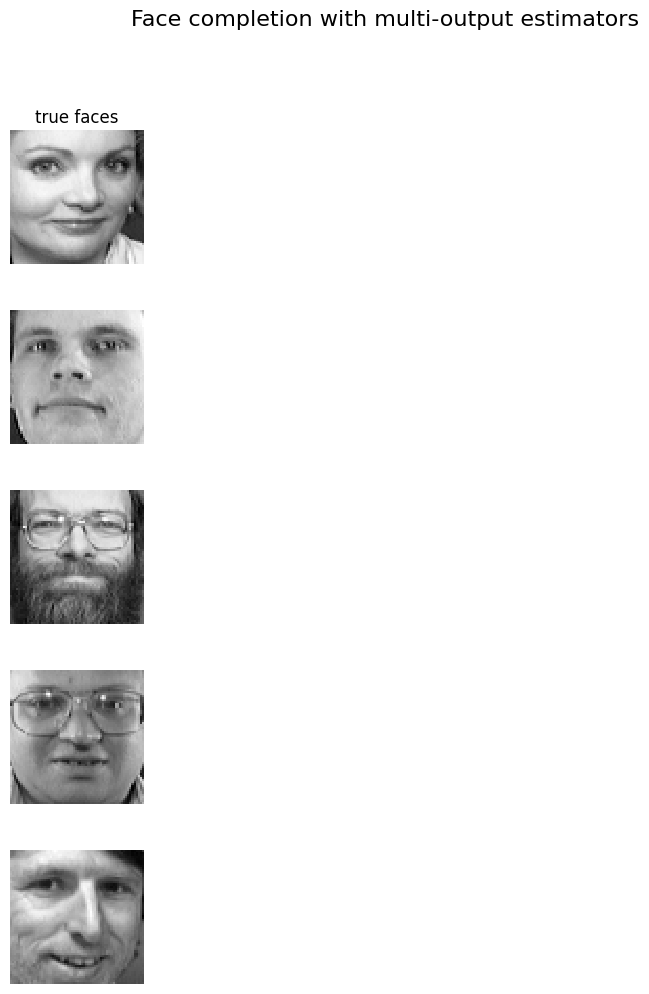

In [ ]:
# Import libraries...
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True) # 64**2 features per row

train = data[targets < 30]  # Train on 30 faces -> 300 images
test = data[targets >= 30]  # Test on independent people -> 10 faces -> 100 images

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,)) #rng.randint(100, size=(5,)) -> find me 5 images from the given 100
test = test[face_ids, :] # featch the features of the selected 5 images

n_pixels = data.shape[1] # 64**2
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2] # all the training rows, however half the number of features (300, 2048)
# Lower half of the faces
y_train = train[:, n_pixels // 2 :] # the remaining features
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

# Fit estimators -> The problem (given half the image/features extrapolate the rest of the image/features)
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i: # not true face column -> 
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
        print("not true: ", n_faces, n_cols, i * n_cols + 1)
    else: # true face column -> 5 rows/faces, 5 columns/estimators, 1st  
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
        print("true: ", n_faces, n_cols, i * n_cols + 1)

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    print("starting estimates......")
    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
            print("est1: ", (n_faces, n_cols, i * n_cols + 2 + j) )
        else:
          # only first row
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)
            print("est2: ", (n_faces, n_cols, i * n_cols + 2 + j) )

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

true:  5 5 1
starting estimates......
first face:  (5, 5, 2)
first face:  (5, 5, 3)
first face:  (5, 5, 4)
first face:  (5, 5, 5)
true:  5 5 6
starting estimates......
other faces:  (5, 5, 7)
other faces:  (5, 5, 8)
other faces:  (5, 5, 9)
other faces:  (5, 5, 10)
true:  5 5 11
starting estimates......
other faces:  (5, 5, 12)
other faces:  (5, 5, 13)
other faces:  (5, 5, 14)
other faces:  (5, 5, 15)
true:  5 5 16
starting estimates......
other faces:  (5, 5, 17)
other faces:  (5, 5, 18)
other faces:  (5, 5, 19)
other faces:  (5, 5, 20)
true:  5 5 21
starting estimates......
other faces:  (5, 5, 22)
other faces:  (5, 5, 23)
other faces:  (5, 5, 24)
other faces:  (5, 5, 25)


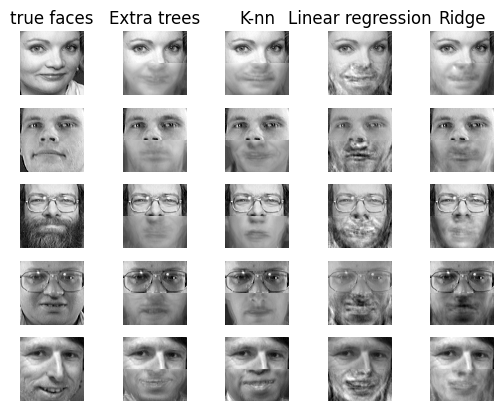

In [ ]:

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i: # not true face column -> 
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
        print("true: ", n_faces, n_cols, i * n_cols + 1)
    else: # true face column -> 5 rows/faces, 5 columns/estimators, 1st  
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
        print("true: ", n_faces, n_cols, i * n_cols + 1)

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
            print("other faces: ", (n_faces, n_cols, i * n_cols + 2 + j) )
        else:
          # only first row
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)
            print("first face: ", (n_faces, n_cols, i * n_cols + 2 + j) )

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

In [ ]:
def extraPolateAFace(image, ESTIMATORS=ESTIMATORS):

  image_shape = (64, 64)
  n_cols = 1 + len(ESTIMATORS)
  n_faces = 1

  n_pixels = image.shape[1]

  # Upper half of the face
  X_upper = image[:, : (n_pixels + 1) // 2]
  # Lower half of the face
  y_test = image[:, n_pixels // 2 :]

  # Predicted y_test : TODO
  y_test_predict = dict() 
  for name, estimator in ESTIMATORS.items():
    y_test_predict[name] = estimator.predict(X_upper)
  

  plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
  plt.suptitle("Face completion with multi-output estimators", size=16)


  true_face = np.hstack((X_upper, y_test))

  sub = plt.subplot(n_faces, n_cols, 1, title="true face")

  sub.axis("off")
  sub.imshow(
      true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
  )

  for j, est in enumerate(sorted(ESTIMATORS)):
      completed_face = np.hstack((X_upper[0], y_test_predict[est][0]))

      sub = plt.subplot(n_faces, n_cols, 2 + j, title=est)
      sub.axis("off")
      sub.imshow(
          completed_face.reshape(image_shape),
          cmap=plt.cm.gray,
          interpolation="nearest",
    )
  
  return plt














In [ ]:
example1 = data[targets >= 30][8:9]

In [ ]:
ESTIMATORS["Ridge"]

RidgeCV()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

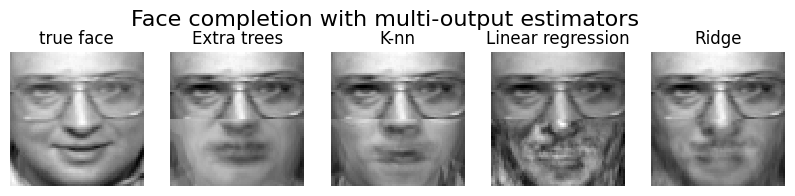

In [ ]:
extraPolateAFace(example1, ESTIMATORS=ESTIMATORS)

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

import gradio as gr

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True) 

train = data[targets < 30]  
test = data[targets >= 30]  

n_pixels = data.shape[1] 

# Training data
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2] 
# Lower half of the faces
y_train = train[:, n_pixels // 2 :] 

# Fit estimators -> The problem (given half the image/features extrapolate the rest of the image/features)
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)

def extrapolateFace(image, ESTIMATORS=ESTIMATORS):

  image_shape = (64, 64)
  n_cols = 1 + len(ESTIMATORS)
  n_faces = 1

  n_pixels = image.shape[1]

  # Upper half of the face
  X_upper = image[:, : (n_pixels + 1) // 2]
  # Lower half of the face
  y_test = image[:, n_pixels // 2 :]

  # Predicted y_test : TODO
  y_test_predict = dict() 
  for name, estimator in ESTIMATORS.items():
    y_test_predict[name] = estimator.predict(X_upper)
  

  plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
  plt.suptitle("Face completion with multi-output estimators", size=16)


  true_face = np.hstack((X_upper, y_test))

  sub = plt.subplot(n_faces, n_cols, 1, title="true face")

  sub.axis("off")
  sub.imshow(
      true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
  )

  for j, est in enumerate(sorted(ESTIMATORS)):
      completed_face = np.hstack((X_upper[0], y_test_predict[est][0]))

      sub = plt.subplot(n_faces, n_cols, 2 + j, title=est)
      sub.axis("off")
      sub.imshow(
          completed_face.reshape(image_shape),
          cmap=plt.cm.gray,
          interpolation="nearest",
    )
  
  return plt

with gr.Blocks() as demo:
    link = "https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#sphx-glr-auto-examples-svm-plot-oneclass-py"
    title = ""
    gr.Markdown(f"# {title}")
    gr.Markdown(f"This demo is based on this [scikit-learn example]({link}).")
    gr.Markdown("In this demo, we use One-class SVM (Support Vector Machine) to learn the decision function for novelty detection.")
    gr.Markdown("Furthermore, we **test** the algorithm on new data that would be classified as similar or different to the training set.")

    gr.Markdown("#### You can define the coordinates of the new data point below!")

    x_new = gr.Slider(-5,5,0, label="X", info="Choose the X coordinate")
    y_new = gr.Slider(-5,5,0, label="Y", info="Choose the Y coordinate")
    
    with gr.Row():
        with gr.Column(scale=2):        
            plot = gr.Plot(label=f"Decision function plot")
        with gr.Column(scale=1):
            prediction = gr.Textbox(label="Is the new data point regular or abormal?")

    x_new.change(createPlotAndPlotPoint,  inputs=[x_new, y_new], outputs=[plot, prediction])
    y_new.change(createPlotAndPlotPoint,  inputs=[x_new, y_new], outputs=[plot, prediction])
    demo.load(createPlotAndPlotPoint, inputs=[x_new, y_new], outputs=[plot, prediction])

if __name__ == "__main__":
    demo.launch()